# Homework 1 in TQFML by Chen Shixin(1601213497)
### Import Pakages

In [49]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

### Import Data and Format Transform

In [50]:
input_file_path = "bank.csv"
output_file_path = "bank_new.csv"
with open(input_file_path, 'r') as f1, \
    open(output_file_path, 'w') as f2:
    for eachLine in f1.readlines():
        f2.write(eachLine.replace(';', ','))

bank_frm = pd.read_csv('bank_new.csv')
bank_frm = pd.get_dummies(bank_frm,columns=['y'])

### Defind Plot Function

In [51]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ['s', 'x', 'o', '^', 'v']
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.8,c=colors[idx],marker=markers[idx],label=cl,edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0],X_test[:, 1],c='',edgecolor='black',alpha=1.0,linewidth=1,marker='o',s=100,label='test set')

### Feature selection(2 features), normalize and divide train/test data

In [52]:
y = bank_frm['y_yes']
x = bank_frm[['age','balance']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
mms = MinMaxScaler()
x_train_norm = mms.fit_transform(x_train)
y_train_norm = (np.array(y_train)-np.min(y_train))/(np.max(y_train)-np.min(y_train))
x_test_norm = mms.fit_transform(x_test)
y_test_norm = (np.array(y_test)-np.min(y_test))/(np.max(y_test)-np.min(y_test))

### SVM model training, accuracy score and plot

accuracy score of svm is 0.876934414149


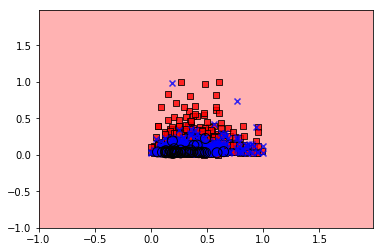

In [53]:
svm = SVC(kernel='rbf',C=1.0,random_state=0)
svm.fit(x_train_norm,y_train_norm)
accuracy_score_train = accuracy_score(y_train_norm,svm.predict(x_train_norm))
accuracy_score_test = accuracy_score(y_test,svm.predict(x_test_norm))
print('accuracy score of svm is '+str(accuracy_score_test))
plt.figure(1)
y_combined = np.hstack((y_train_norm,y_test_norm))
x_combined = np.vstack((x_train_norm,x_test_norm))
plot_decision_regions(X=x_combined, y=y_combined,classifier=svm, test_idx=range(105, 150))
plt.show()

### Tree model training, accuracy score and plot

accuracy score of decision tree is 0.827560795873


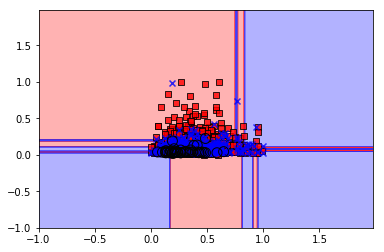

In [54]:
tree = DecisionTreeClassifier(criterion='entropy',random_state=0)
tree.fit(x_train_norm,y_train_norm)
accuracy_score_train = accuracy_score(y_train_norm,tree.predict(x_train_norm))
accuracy_score_test = accuracy_score(y_test_norm,tree.predict(x_test_norm))
print('accuracy score of decision tree is '+str(accuracy_score_test))
plt.figure(2)
y_combined = np.hstack((y_train_norm,y_test_norm))
x_combined = np.vstack((x_train_norm,x_test_norm))
plot_decision_regions(X=x_combined, y=y_combined,classifier=tree, test_idx=range(105, 150))
plt.show()

### Logistic Regression training, accuracy score and plot

accuracy score of logistic regression is 0.876934414149


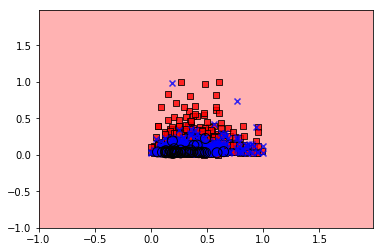

In [55]:
lr = LogisticRegression(C=1000)
lr.fit(x_train_norm,y_train_norm)
accuracy_score_train = accuracy_score(y_train_norm,lr.predict(x_train_norm))
accuracy_score_test = accuracy_score(y_test_norm,lr.predict(x_test_norm))
print('accuracy score of logistic regression is '+str(accuracy_score_test))
plt.figure(3)
y_combined = np.hstack((y_train_norm,y_test_norm))
x_combined = np.vstack((x_train_norm,x_test_norm))
plot_decision_regions(X=x_combined, y=y_combined,classifier=lr, test_idx=range(105, 150))
plt.show()

### Use the three methods above to find best 2 features

In [56]:
y = bank_frm['y_yes']
accuracy_score_ix = []
accuracy_score_svm = []
accuracy_score_dt = []
accuracy_score_lr = []
for i in range(len(bank_frm.columns)-2):
    for j in range(i+1,len(bank_frm.columns)-2):
        x = bank_frm.iloc[:,[i,j]]
        x = pd.get_dummies(x)
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
        mms = MinMaxScaler()
        x_train_norm = mms.fit_transform(x_train)
        y_train_norm = (np.array(y_train)-np.min(y_train))/(np.max(y_train)-np.min(y_train))
        x_test_norm = mms.fit_transform(x_test)
        y_test_norm = (np.array(y_test)-np.min(y_test))/(np.max(y_test)-np.min(y_test))
        
        accuracy_score_ix.append(list(bank_frm.columns[[i,j]]))
        # Use SVM to fit
        svm = SVC(kernel='rbf',C=1.0,random_state=0)
        svm.fit(x_train_norm,y_train_norm)
        accuracy_score_train = accuracy_score(y_train_norm,svm.predict(x_train_norm))
        accuracy_score_test = accuracy_score(y_test,svm.predict(x_test_norm))
        accuracy_score_svm.append([accuracy_score_test])
        # Use Decision Tree to fit
        tree = DecisionTreeClassifier(criterion='entropy',random_state=0)
        tree.fit(x_train_norm,y_train_norm)
        accuracy_score_train = accuracy_score(y_train_norm,tree.predict(x_train_norm))
        accuracy_score_test = accuracy_score(y_test_norm,tree.predict(x_test_norm))
        accuracy_score_dt.append([accuracy_score_test])
        # Use Logistic Regression to fit
        lr = LogisticRegression(C=1000)
        lr.fit(x_train_norm,y_train_norm)
        accuracy_score_train = accuracy_score(y_train_norm,lr.predict(x_train_norm))
        accuracy_score_test = accuracy_score(y_test_norm,lr.predict(x_test_norm))
        accuracy_score_lr.append([accuracy_score_test])

svm_best_features = accuracy_score_ix[np.argmax(accuracy_score_svm)]
dt_best_features = accuracy_score_ix[np.argmax(accuracy_score_dt)]
lr_best_features = accuracy_score_ix[np.argmax(accuracy_score_lr)]
print('The best 2 features of svm is '+svm_best_features[0]+' and '+svm_best_features[1]+', the highest accuracy score is '+str(np.max(accuracy_score_svm)))
print('The best 2 features of decision tree is '+dt_best_features[0]+' and '+dt_best_features[1]+', the highest accuracy score is '+str(np.max(accuracy_score_dt)))
print('The best 2 features of logistic regression is '+lr_best_features[0]+' and '+lr_best_features[1]+', the highest accuracy score is '+str(np.max(accuracy_score_lr)))

The best 2 features of svm is age and poutcome, the highest accuracy score is 0.887251289609
The best 2 features of decision tree is marital and poutcome, the highest accuracy score is 0.887251289609
The best 2 features of logistic regression is duration and poutcome, the highest accuracy score is 0.899042004422
